
# Simulating traffic on a cyclic road
The state of cellular automata is represented by a 1-dimensional array, the length of which represents the lenght of the road. The boundary condition is periodic, conceptually this means that we can think of the road as being a circle with cars going round and round. 

If there is not a car in a cell, the value of that cell is -1. Else, if there is a value in the range 0-max velocity (set to be 5 in both the Nagel and this paper) there is a car in the cell, with the value representing the speed of the car.

Running the cellular automata consists of two steps: (1) updating the velocities and (2) moving the cars.

1. The speed of each car is updated simulateously, given only the current state of all other cars. This means that cars do not take into account the current velocity of cars to estimate where they will be in the subsequent timestep (like a person is likely to do). There are 3 steps to updating the velocity of each car:
    1. If the car is travelling at less than max velocity, increase speed by 1.
    2. If the distance, defined as the number of empty cells between two cars plus 1, to the next car in front is smaller than or equal to the current velocity of the car, decrease the velocity to the distance-1.
    3. If the current speed is not 0, with some fixed probability (slowdown_proba), decrease the velocity by 1.
    
2. Each car is simultaneously advanced along the lane by the same number of cells as its velocity. E.g. if velocity is 2, move the car 2 cells forward.

By simultaneously, we mean that the first step is performed for every car before the second step is performed for any car. That is, all velocities are updated before any car is moved.

## Extending the model to multiple lanes
In the multiple lane model, the cellular automata is represented by a mxn array where m denotes the number of lanes and n the length of the road. In the edge case, a single lane road can be thought of a 1xn array.

To extend the model to multiple lanes, we now add a third step to running the cellular automata: updating the lanes of cars. This step will be performed before updating the velocities of cars and before moving them. Once it is completed, running the multiple lane cellular automata is equivalent to running several instances of the single-lane cellular automata defined previously. That is, for each lane, we perform simultaneous updates of velocity, then simultanous moving of the car. This means we only need to add a method for updating lanes.

If a car cannot accelerate––or in the case that it is already travelling at max velocity, maintain max velocity––in its current lane, it will see if it can in one of the adjacent lanes. That is, if the car can 1) accelerate––or in the case that it is already travelling at max velocity, maintain max velocity––and 2) fit without obstructing the car behind it in the new lane, it will swap. Specifically, we define a car to "fit" in a new lane if the distance to the next car behind it in the new lane is greater than 5. This definition is motivated by the assumption that cars are unable to infer the speed at which other cars are travelling. Consequently, the distance must be at least 5 to ensure that the car will not be hit by the one behind it, even if it is travelling at max velocity.

It turns out, however, that the authors of the original paper I am tasked to replicate sprinkled in some additional conservatism and caution into these update rules. Namely, it is not sufficient that the distance to the next car ahead be large enough for one to accelerate––or in the case that it is already travelling at max velocity, maintain max velocity. To change, it must be equal to that **plus 2**, as the number of empty cells to the car before the car in front (equal to distance-1) must be at least one greater than the current velocity. Furthermore, the distance to the next car behind must so large that it cannot hit you even if it is travelling at the maximum velocity a car can travel, **plus 1!** Admittedly, I find these tweaks to the logic outlined above to make little sense (as even in the original formulation they seem overly conservative), it is these rules that will be applied in the simulations.

Thus, the procedure for the multilane model can be summarized as follows:

1. Update Lanes 
2. Update Velocity
3. Move

### Model Parameters
* road_length. The number of cells per lane. In our simulations this number is set to 100.
* n_lanes. The number of lanes on the road. We study how the flow of traffic at different densities is affected by the number of lanes on the road.
* traffic_density. The proportion of cells in the road that are occupied by cars. E.g. if there are 20 cars in a road with length 100 and two lanes, the traffic density is 20/(2 * 100) = 0.1.
* max_velocity. The maximum speed that cars can travel. In our simulations this is 5, meaning that a car can at most be advanced by 5 cells in one time step.
* slowdown_proba. Determines the probability with which a car will decrease its velocity by 1, given that it is not already has speed 0.
* p_swap_lane. The probability that a car will perform the lane swap, given that the conditions for swithcing lanes are met. In out simulations, this is set to 1. That is, if the conditions are met, the cars always perform the swap.


# Studying traffic behavior of the simulations on 1 lane and 2 lane roads

## Visualizing the state of the models over time


For low (0.1), medium (0.5), and high (0.9) densities




## Comparing traffic flow

Traffic flow is defined as the average number of cars passing a specific cell border on the road per timestep. In our case the end of the road, the border between the 100th and 1st cells (however, the results are invariant with respect to the choice of cell border).

The average traffic flow for each density was generated by initializing a random car configurations with the correct density. All cars are initialized with velocity 0. The simulation is then run for 100 steps without recording any results. This is to let the simulation "warm up" and let the cars get up to speed–the intial road filled with cars that aren't moving is not representative of how traffic actually behaves. The number of cars passing the cell border is then recorded for each of the subsequent 100 time steps. This entire procedure is repeated 25 times for each density. The average traffic flow for each density, then, is computed by averaging the flow across the 100 * 25 = 2500 time steps. We repeat this process for every 1% increment in density between 1% and 80%.


# Assumptions of the model: is it suitable for predicting traffic in Buenos Aires?

All cars are the same. In our simulation, the car fleet on the road is homogenous. In reality, some cars are faster than others. This may play an important role on roads with a high speed limit, like highways, it is unlikely to affect traffic in a city like Buenos Aires, where the speed limits are invariably low. That is, in cities, drivers are constrained by the permissible speed more so than the performance capabilities of their cars.

All drivers behave the same. In our simulation, the drivers on the road are homogenous. They change lanes under the same conditions, they speed up the same way, they all slowdown with the same probability, and so on. This most definitely not true in Buenos Aires, or any other city for that matter.

The road is assumed to be homogenous. The road of this simulation is equally wide at all points, the speed limit is the same everywhere and there are no traffic lights or intersections. None of this is likely to hold true for a real world traffic system such as Buenos Aires.

The road is a closed system. Because the road is a circle cars never leave or enter, the density remains fixed for the duration of the simulation. In the Buenos Aires, 

Drivers disregard the velocity of other cars when making decisions. In our model, drivers consider only the position of others cars at the current time steps when making lane switching and velocity changes. In the real world, people are likely to also consider the speed of other cars. Whilst it might be true that in the face of uncertainty about the speed and trajectory of other cars, drivers tend to err on the side of caution, it seems highly unlikely that drivers are unable to infer the speed at which cars are moving. This becomes particularly apparent when we consider the fact that the real world is continous, cars are moving constantly. There is no move,freeze,evaluate,update,move-cycle. It seems to me people are more likely to consider some other heuristic like maintaining a minimum distance to the car ahead

Drivers break as much as necessary but speed up only gradually. As opposed to speeding uo. Realistically, people are likely to speed up quickly to reach the speed limit or the car ahead of them in a few seconds - roughly the same amount of time required to break to avoid crashing into cars ahead of them.

It is clear that there are many assumptions made in the model that do not seem to hold true in Buenos Aires (BA). However, it is inherent in the modelling endeavor that simplifying assumptions must be made. After all, we are not trying to replicate the system itself, merely the necessary conditions to simulate some aspect of it behavior. Thus, the question of whether this simulation is suitable for predicting traffic in Buenos Aires is empirical. That is, does the traffic behavior exhibited by the simulations accurately mirror that of Buenos Aires? Consequently, the quality of the assumptions made in this model should not be evaluated on whether they hold true in reality. Perhaps some aspects of traffic behavior, like the lane swapping behavior of cars in a straight stretch of road, are captured, whilst others, like mean flow as a function of density, are not captured. To answer this, we would need to study the traffic behavior on BA roads and then compare it to that of the simulation. If accurate, we could, for example, use it to predict the behavior on road segments in BA where data has not been collected.

That said, I suspect that the omission of intersections and multiple roads from the model makes it ill-suited for simulating BA traffic–a dense city with intersections every 100 meters or so. I think stop lights are the main cause of stopping/jams, and that lane swapping is primarly motivated by the desire to navigate ones car so that one can turn onto another road.


# Future Work
Currently, there are approximately linear returns to adding lanes. That is, for every lane that we add, we can increase the number of additional cars that can be transported increases.
However, this is unlikely to be true in reality, due to on- and off-ramps. 

Modifying the Model assumptions:

Employing the model:

That said, it may prove challening to model certain road structures using our current grid-based cellular automata approach. This is because cells have at most 8 directly adjacent cells with strict restraints on the angle at which they lie. Furthermore, the model relies on the assumption that cars can only move along 4 of these directions, left or right, up or down. This imposes limits on the sophistication of the traffic networks that can be modelled using the cellular automata approach. For example, it is not clear how one would model a roundabout, or a 3- or 5-way intersection, where multiple roads would intersect in ways that cannot be described construed as intersecting at right angles (mutually). Adapting our simulation to use a graph based structure may alleviate this problem, as it does not constrain the number of nodes(road segments) that are connected, allowing for more complex, curved road segments to be modelled.


# Appendix: Code


In [45]:
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt

class TrafficSimulation(object):
    
    def __init__(self, road_length, traffic_density, 
                 max_velocity, slowdown_proba, 
                 p_swap_lane = 1, n_lanes=2):
        
        assert type(max_velocity) is int, "Max_velocity must be an integer!"
        self.max_velocity = max_velocity
        
        assert type(road_length) is int, "Road length must be an integer!"
        self.road_length = road_length
        
        assert traffic_density >= 0 and traffic_density <=1, "Traffic density must be a proportion, 0<=x<=1"
        self.traffic_density = traffic_density
        
        assert slowdown_proba >= 0 and slowdown_proba <=1, "slowdown_proba must be a probability, 0<=x<=1"
        self.slowdown_proba = slowdown_proba
        
        assert p_swap_lane >= 0 and p_swap_lane <=1, "p_swap_lane must be a probability, 0<=x<=1"
        self.p_swap_lane = p_swap_lane
        
        assert type(n_lanes)==int, "Number of lanes must be an integer"
        self.n_lanes = n_lanes
        
        #Track number of cars that have passed the boundary
        self.flow = 0
        
        #Track number of timestep the simulation has been run
        self.time = 0
        
        #Number of cells to look back is equal to the maximum velocity
        self.look_back = max_velocity
        
        #Make road
        #Infer number of cars
        self.num_cars = np.round(road_length*traffic_density*n_lanes)
        num_cars = np.round(road_length*n_lanes*traffic_density)
        road_array = -np.ones((n_lanes, road_length), dtype=int)
        
        car_counter = 0
        #Insert the cars with 0 velocity at random positions on the road
        while car_counter < num_cars:
            random_loc = random.randrange(0, n_lanes), random.randrange(0, road_length)
            if road_array[random_loc] == -1:
                road_array[random_loc] = 0
                car_counter += 1
                
        self.road = road_array
        
    def look(self, lane, cell, ahead=True):
        '''
        Takes a current position, defined using lane and cell
        Returns distance to next car in direction ahead
        if ahead=False, returns distance to next car behind
        
        Distance is defined to be 0 if there is a car in same cell in other lane
        '''
        #If there is a car in the same cell in the other lane
        if self.road[lane, cell] == -1:
            return 0
            
        #1 if ahead
        if ahead:
            increment = 1
        else: 
            increment = -1
        
        distance = increment
        while self.road[lane, (cell + distance) % self.road_length] == -1:
            distance += increment
        
        return distance
        
    def can_accelerate(self, velocity, front_distance):
        '''
        Takes a speed and a distance to the next car in front,
        return a bool indicating if the car can speed up 
        (or in the case it is already at max_velocity, maintain its speed)
        '''
        
        #If already at max speed, see if you can maintain it in lane
        if velocity == self.max_velocity:
            if velocity >= front_distance:
                return False
        
        else: #see if you can speed up
            if velocity+1 >= front_distance:
                return False
        
        return True
    
    def check_lane(self, lane, cell, velocity):
        '''
        Checks if car, moved to road[lane, position] can:
        1) Accelerate
        2) Fit without obstructing car behind it
        '''
        
        #Look ahead, see if can accelerate
        front_distance = self.look(lane, cell)
        if not self.can_accelerate(velocity, front_distance):
            return False
        
        #Look back, see if there is space
        back_distance = self.look(lane, cell, ahead=False)
        #Back distance is negative, so we convert it to positive by *-1
        if -1*back_distance < self.max_velocity:
            return False
        
        return True
        
    def update_lanes(self):
        '''
        Updates the lane of each of the cars on the road,
        Starting from the top lane and working downwards
        
        look forward = v+1, lo = l, lo;back = 5 = vmax, and pchange = 1
        '''
        #If there is only one lane on the road, skip this step
        if self.n_lanes == 1:
            return
        
        #Make an empty road to store updates on
        next_state = -np.ones((self.n_lanes, self.road_length), dtype=int)
        for lane in range(self.n_lanes):
            #For every cell in lane
            for cell in range(self.road_length):    
                
                #if cell is not a car, go to next cell
                if self.road[lane, cell] != -1:
                    
                    #Current speed of car
                    current_velocity = self.road[lane, cell]

                    #Get distance to car in front
                    distance = 1  # The number of empty cells between this car and the next plus 1
                    while self.road[lane, ((cell + distance) % self.road_length)] == -1:
                        distance += 1

                    #Flag for whether the car will look for lane swap
                    attempt_lane_swap = not self.can_accelerate(current_velocity, distance)
                    #print(attempt_lane_swap)
                    
                    #Try switching to lane above, else try lane down
                    if attempt_lane_swap:
                        

                        #If not already in the top lane, evaluate switching there
                        check_right = True
                        
                        if lane-1 >= 0:
                            if self.check_lane(lane-1, cell, current_velocity):
                                #print("I will can switch up")


                                #Swap possible to swap, swap with p=p_swap_lane
                                if random.random() <= self.p_swap_lane:
                                    next_state[lane-1, cell] = current_velocity
                                    check_right = False
                                
                                else:
                                    if not lane+1 <= self.n_lanes-1:
                                        next_state[lane, cell] = current_velocity
                            else:
                                if not lane+1 <= self.n_lanes-1:
                                    next_state[lane, cell] = current_velocity


                        #If not already in the bottom lane, evaluate switching there
                        #Same logic applies
                        if lane+1 <= self.n_lanes-1 and check_right:
                            if self.check_lane(lane+1, cell, current_velocity):

                                #Swap possible to swap, swap with p=p_swap_lane
                                if random.random() <= self.p_swap_lane:
                                    next_state[lane+1, cell] = current_velocity
                                else:
                                    next_state[lane, cell] = self.road[lane, cell]
                            else:
                                next_state[lane, cell] = self.road[lane, cell]
                        else:
                            next_state[lane, cell] = self.road[lane, cell]
                    else:
                        next_state[lane, cell] = self.road[lane, cell]

        
        #Update the lane of all cars simultaneously
        assert (self.road_length*self.n_lanes)-self.num_cars == np.count_nonzero(next_state==-1), "{}Cars dissapeared".format((self.road_length*self.n_lanes)-self.num_cars - np.count_nonzero(next_state==-1))
        self.road = next_state
    
    
    def update_velocities(self):
        '''
        Updates velocity of each of the cars on the road
        '''
        
        for lane in range(self.n_lanes):
            #For every cell in lane
            for cell in range(self.road_length):
                
                #if cell is not a car, go to next cell
                if self.road[lane, cell] != -1:
                    

                    #Get distance to car in front
                    #distance = self.look(lane, cell
                    distance = 1  # The number of empty cells between this car and the next plus 1
                    while self.road[lane, ((cell + distance) % self.road_length)] == -1:
                        distance += 1

                    #Accelerate car by 1, if not already at max speed
                    if self.road[lane, cell] < self.max_velocity:
                        self.road[lane, cell] += 1

                    #Slow down due to other cars?
                    if self.road[lane, cell] >= distance:
                        self.road[lane, cell] = distance-1

                    #Random slowdown?
                    if random.random() <= self.slowdown_proba and  self.road[lane, cell]> 0:
                        self.road[lane, cell] -= 1
                    
        
    def step(self, track=False):
        '''
        Advances each car along its lane by its velocity
        '''
        if track:
            self.time += 1
        
        next_state = -np.ones((self.n_lanes, self.road_length), dtype=int)
        for lane in range(self.n_lanes):
            #For every cell in lane
            for cell in range(self.road_length):
                if self.road[lane, cell] != -1:
                    
                    #Check if car passes boundary
                    if track and (cell + self.road[lane, cell] > self.road_length-1):
                        self.flow += 1
                    
                    #next cell = current cell + current velocity, adjusting for periodic boundary
                    next_cell = (cell + self.road[lane, cell]) % self.road_length
                    next_state[lane, next_cell] = self.road[lane, cell]
                    
        self.road = next_state
                
    def display(self):
        plt.figure(figsize=(21, 2.5+(2.55*self.n_lanes)))
        sns.heatmap(np.where(self.road==-1, np.nan, self.road),
                        square=True, cmap="RdYlGn", vmin=0, vmax=self.max_velocity,
                        cbar=False, xticklabels=False, yticklabels=False,
                        alpha=.75, linewidths=0.75, linecolor="black")
        
    def display_basic(self):
        print(''.join('.' if x == -1 else str(x) for x in self.road[0]))

        
    def run(self, steps, warmup=0, display=False, track=True):
        '''
        Runs warmup laps without visualizing the results to get cars up to speed
        Then visualizes steps of the simulation
        '''
        
        #Warmup: Run warmup times without displaying state
        for step in range(warmup):

            #Update lanes, velocities and step
            self.update_lanes()
            self.update_velocities()
            self.step() #not tracking

        #Run simulation for # steps, displaying state after each
        for step in range(steps):
                
            #Update and step
            self.update_lanes()
            self.update_velocities()
            
            #Display state
            if display:
                self.display()
                
            self.step(track=track)

In [46]:
my_road=TrafficSimulation(50, 0.3, 5, 0.5, n_lanes=2)
my_road.run(10, 100, True)

AssertionError: -1.0Cars dissapeared

In [17]:
def get_flow_data(simulations_per_density, steps_per_road, n_lanes=1):
    
    
    flow_rate_list = [[],[]] #for scatter plot
    mean_flow = [] #for plot
    lower_bound = [] 
    upper_bound = [] 
    
    density_list = [x/100 for x in range(1, 80, 1)]
    
    for density in density_list:
        #Intialize road with density
        temp_list = [] 

        for runs in range(simulations_per_density):
            #Run with 100 warmup, tracking post-warmup results
            my_road = TrafficSimulation(100, density, 5, 0.5, n_lanes=n_lanes)
            my_road.run(steps_per_road,100, False, True)
            
            
            #Store density and flow
            flow_rate_list[1].append(my_road.flow/my_road.time)
            flow_rate_list[0].append(density)
            
            #Store a temp list to use for computing percentile stats
            temp_list.append(my_road.flow/my_road.time)
            
        
        mean_flow.append(np.mean(temp_list))
        lower_bound.append(np.percentile(temp_list, 2.5))
        upper_bound.append(np.percentile(temp_list, 97.5))
    
    return flow_rate_list, mean_flow, upper_bound, lower_bound, density_list

In [19]:
def get_flow_data1(simulations_per_density, steps_per_road, n_lanes=1):
    
    
    flow_rate_list = [[],[]] #for scatter plot
    mean_flow = [] #for plot
    lower_bound = [] 
    upper_bound = [] 
    
    density_list = [x/100 for x in range(1, 80, 1)]
    
    for density in density_list:
        #Intialize road with density
        temp_list = [] 

        for runs in range(simulations_per_density):
            #Run with 100 warmup, tracking post-warmup results
            my_road = TrafficSimulation(50, density, 5, 0.5, n_lanes=n_lanes)
            my_road.run(steps_per_road,200, False, True)
            
            
            #Store density and flow
            flow_rate_list[1].append((my_road.flow/my_road.n_lanes)/my_road.time)
            flow_rate_list[0].append(density)
            
            #Store a temp list to use for computing percentile stats
            temp_list.append((my_road.flow/my_road.n_lanes)/my_road.time)
            
        
        mean_flow.append(np.mean(temp_list))
        lower_bound.append(np.percentile(temp_list, 2.5))
        upper_bound.append(np.percentile(temp_list, 97.5))
    
    return flow_rate_list, mean_flow, upper_bound, lower_bound, density_list

In [23]:
flow_rate_list1, mean_flow1, upper_bound1, lower_bound1, density_list1 = \
        get_flow_data(25, 100, n_lanes=1)

In [20]:
flow_rate_list2, mean_flow2, upper_bound2, lower_bound2, density_list2 = \
        get_flow_data1(25, 100, n_lanes=2)

In [14]:
def plot_flow(flow_rate_list, mean_flow, upper_bound, lower_bound, density_list, n_lanes):
    plt.figure(figsize=(12, 12))
    params = {'legend.fontsize': 'x-large',
              'figure.figsize': (15, 5),
             'axes.labelsize': 'xx-large',
             'axes.titlesize':'xx-large',
             'xtick.labelsize':'xx-large',
             'ytick.labelsize':'xx-large'}
    plt.rcParams.update(params)
    
    
    plt.scatter(flow_rate_list[0], flow_rate_list[1], linewidth=0.1)
    plt.plot(density_list, mean_flow, linewidth=5)
    plt.fill_between(density_list, upper_bound, lower_bound, alpha=0.3)
    plt.title("%s: Traffic Flow vs Traffic density"%n_lanes)
    plt.xlabel("Density [car per site]")
    plt.ylabel("Flow [car per timestep]")
    
    plt.show()

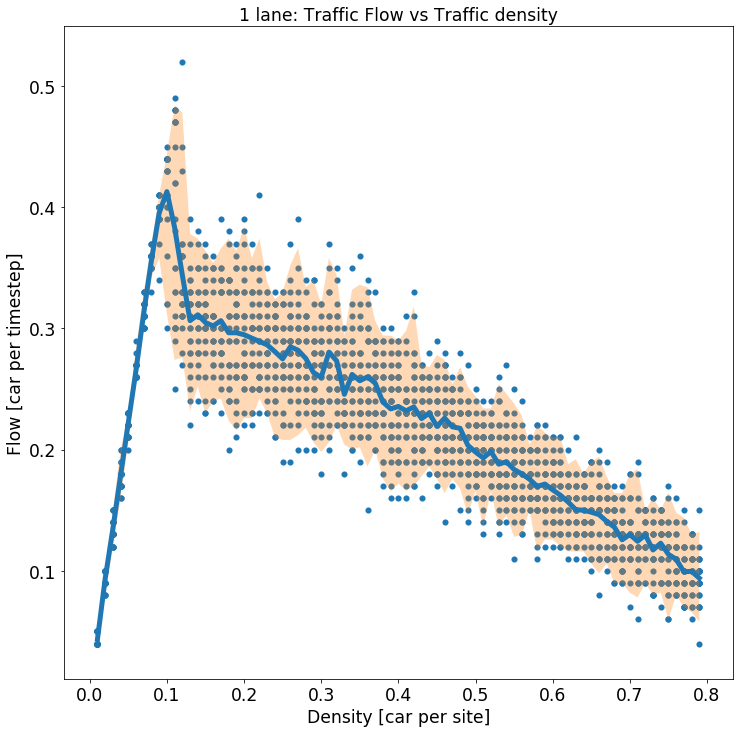

In [24]:
plot_flow(flow_rate_list1, mean_flow1, upper_bound1, lower_bound1, density_list1, "1 lane")

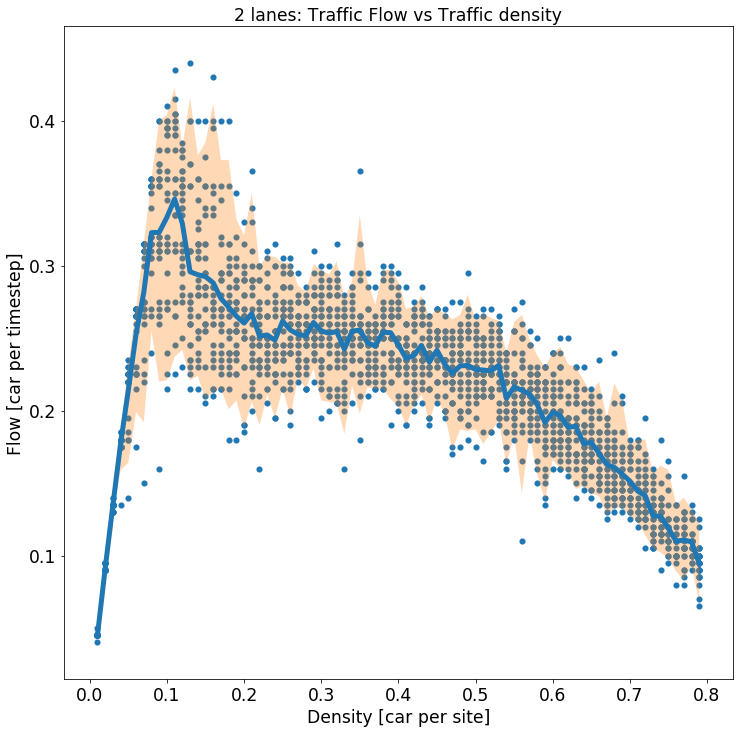

In [21]:
plot_flow(flow_rate_list2, mean_flow2, upper_bound2, lower_bound2, density_list2, "2 lanes")

In [ ]:
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt

class TrafficSimulation(object):
    
    def __init__(self, road_length, traffic_density, 
                 max_velocity, slowdown_proba, 
                 p_swap_lane = 1, n_lanes=2):
        
        assert type(max_velocity) is int, "Max_velocity must be an integer!"
        self.max_velocity = max_velocity
        
        assert type(road_length) is int, "Road length must be an integer!"
        self.road_length = road_length
        
        assert traffic_density >= 0 and traffic_density <=1, "Traffic density must be a proportion, 0<=x<=1"
        self.traffic_density = traffic_density
        
        assert slowdown_proba >= 0 and slowdown_proba <=1, "slowdown_proba must be a probability, 0<=x<=1"
        self.slowdown_proba = slowdown_proba
        
        assert p_swap_lane >= 0 and p_swap_lane <=1, "p_swap_lane must be a probability, 0<=x<=1"
        self.p_swap_lane = p_swap_lane
        
        assert type(n_lanes)==int, "Number of lanes must be an integer"
        self.n_lanes = n_lanes
        
        #Track number of cars that have passed the boundary
        self.flow = 0
        
        #Track number of timestep the simulation has been run
        self.time = 0
        
        #Number of cells to look back is equal to the maximum velocity
        self.look_back = max_velocity
        
        #Make road
        #Infer number of cars
        self.num_cars = np.round(road_length*traffic_density*n_lanes)
        num_cars = np.round(road_length*n_lanes*traffic_density)
        road_array = -np.ones((n_lanes, road_length), dtype=int)
        
        car_counter = 0
        #Insert the cars with 0 velocity at random positions on the road
        while car_counter < num_cars:
            random_loc = random.randrange(0, n_lanes), random.randrange(0, road_length)
            if road_array[random_loc] == -1:
                road_array[random_loc] = 0
                car_counter += 1
                
        self.road = road_array
        
    def look(self, lane, cell, ahead=True):
        '''
        Takes a current position, defined using lane and cell
        Returns distance to next car in direction ahead
        if ahead=False, returns distance to next car behind
        
        Distance is defined to be 0 if there is a car in same cell in other lane
        '''
        if self.road[lane, cell] != -1:
            return 0
            
        #1 if ahead
        if ahead:
            increment = 1
        else: 
            increment = -1
        
        #Keep looking one cell further out until a car is found
        #or far out enough has been checked for it not to matter
        #% operator accounts for periodic boundary condition
        distance = increment
        while self.road[lane, (cell + distance) % self.road_length] == -1 and abs(distance) < self.max_velocity+3:
            distance += increment
        
        return distance
    
    def check_lane(self, lane, cell, velocity):
        '''
        Checks if car, moved to road[lane, position] can:
        1) Accelerate
        2) Fit without obstructing car behind it
        3) Random draw from uniform distrubution on 0,1 < p_change
        '''
        
        #Look ahead, see if can accelerate
        front_distance = self.look(lane, cell)
        cond1 = front_distance-1 > velocity+1
        
        #Look back, see if there is space
        back_distance = self.look(lane, cell, ahead=False)
        #Back distance is negative, so we convert it to positive by *-1
        cond2 = (-1*back_distance)-1 > self.max_velocity
        
        cond3 = random.random() < self.p_swap_lane
        
        #Returns True iff all conditions are met
        return cond1*cond2*cond3
    
    def update_lanes(self):
        '''
        Updates the lane of each of the cars on the road,
        Starting from the top lane and working downwards
        
        look forward = v+1, lo = l, lo; back = 5 = vmax, and pchange = 1
        '''
        #If there is only one lane on the road, skip this step
        if self.n_lanes == 1:
            return
        
        #Make an empty road to store updates on
        next_state = -np.ones((self.n_lanes, self.road_length), dtype=int)
        for lane in range(self.n_lanes):
            #For every cell in lane
            for cell in range(self.road_length):    
                
                #if cell is not a car, go to next cell
                if self.road[lane, cell] != -1:
                    
                    #Current speed of car
                    current_velocity = self.road[lane, cell]

                    #Get distance to car in front
                    distance = 1  # The number of empty cells between this car and the next plus 1
                    while self.road[lane, ((cell + distance) % self.road_length)] == -1:
                        distance += 1
                    
                    #if gap(i) < l
                    attempt_lane_swap = (distance-1) < (current_velocity+1)
                    
                    #IF not attempting to switch, stay
                    if attempt_lane_swap:                        
                        #If already in the top lane, evaluate switching down                        
                        if lane == 0:
                            if self.check_lane(lane+1, cell, current_velocity):
                                next_state[lane+1, cell] = current_velocity
                            else:
                                next_state[lane, cell] = current_velocity
                            
                        #If already in the bottom lane, evaluate switching up
                        elif lane == self.n_lanes-1:
                            if self.check_lane(lane-1, cell, current_velocity):
                                next_state[lane-1, cell] = current_velocity
                            else:
                                next_state[lane, cell] = current_velocity
                        
                        #If there is a lane both to the left and to the right of current lane
                        else:
                            #Randomly choose whether to evaluate switching up or down first
                            random_lane = random.choice([-1, 1])
                            
                            if self.check_lane(lane+random_lane, cell, current_velocity):
                                next_state[lane+random_lane, cell] = current_velocity
                                
                                
                            #Else, check if it is possible to change to other lane
                            elif self.check_lane(lane+(-1*random_lane), cell, current_velocity):
                                next_state[lane+random_lane, cell] = current_velocity
                                
                            #If no laneswap is possible, stay in current lane
                            else: 
                                next_state[lane, cell] = current_velocity
                                
                    else:
                        next_state[lane, cell] = current_velocity
                else:
                    next_state[lane, cell] = self.road[lane, cell]
                    
        #Update the lane of all cars simultaneously
        if (self.road_length*self.n_lanes)-self.num_cars == np.count_nonzero(next_state==-1), (self.display(), next_state)
        self.road = next_state
    
    
    def update_velocities(self):
        '''
        Updates velocity of each of the cars on the road
        '''
        
        for lane in range(self.n_lanes):
            #For every cell in lane
            for cell in range(self.road_length):
                
                #if cell is not a car, go to next cell
                if self.road[lane, cell] != -1:
                    

                    #Get distance to car in front
                    #distance = self.look(lane, cell
                    distance = 1  # The number of empty cells between this car and the next plus 1
                    while self.road[lane, ((cell + distance) % self.road_length)] == -1:
                        distance += 1

                    #Accelerate car by 1, if not already at max speed
                    if self.road[lane, cell] < self.max_velocity:
                        self.road[lane, cell] += 1

                    #Slow down due to other cars?
                    if self.road[lane, cell] >= distance:
                        self.road[lane, cell] = distance-1

                    #Random slowdown?
                    if random.random() <= self.slowdown_proba and  self.road[lane, cell]> 0:
                        self.road[lane, cell] -= 1
                    
        
    def step(self, track=False):
        '''
        Advances each car along its lane by its velocity
        
        Stores all updates on a copy of the road
        '''
        if track:
            self.time += 1
        
        #Copy of the road, intialized to be empty
        #Will be filled successively
        next_state = -np.ones((self.n_lanes, self.road_length), dtype=int)
        #For every lane
        for lane in range(self.n_lanes):
            #For every cell in lane
            for cell in range(self.road_length):
                if self.road[lane, cell] != -1:
                    
                    #Check if car passes boundary
                    if track and (cell + self.road[lane, cell] > self.road_length-1):
                        self.flow += 1
                    
                    #next cell = current cell + current velocity, adjusting for periodic boundary
                    next_cell = (cell + self.road[lane, cell]) % self.road_length
                    next_state[lane, next_cell] = self.road[lane, cell]
                    
        #assert (self.road_length*self.n_lanes)-self.num_cars == np.count_nonzero(next_state==-1), "Cars removed in step: {}".format(self.time)
        self.road = next_state
                
    def display(self):
        plt.figure(figsize=(21, 2.5+(2.55*self.n_lanes)))
        sns.heatmap(np.where(self.road==-1, np.nan, self.road),
                        square=True, cmap="RdYlGn", vmin=0, vmax=self.max_velocity,
                        cbar=False, xticklabels=False, yticklabels=False,
                        alpha=.75, linewidths=0.75, linecolor="black")
        
    def display_basic(self):
        print(''.join('.' if x == -1 else str(x) for x in self.road[0]))
        
    def run(self, steps, warmup=0, display=False, track=True):
        '''
        Runs warmup laps without visualizing the results to get cars up to speed
        Then visualizes steps of the simulation
        '''
        
        #Warmup: Run warmup times without displaying state
        for step in range(warmup):

            #Update lanes, velocities and step
            self.update_lanes()
            self.update_velocities()
            self.step() #not tracking

        #Run simulation for # steps, displaying state after each
        for step in range(steps):
                
            #Update and step
            self.update_lanes()
            self.update_velocities()
            
            #Display state
            if display:
                self.display()
                
            self.step(track=track)